### Binary Classification Experiment 
### Predicting Employee Productivity in Garment Industry - The Machine Learning Dimension

### Classification

Classification involves deciding whether a sample is part of one class or another.

### 1. Problem Definition

This experiment project will be exploring a **Binary classification**. 

The dataset would be used for classification purpose by transforming the actual productivity range (0-1) into three different classes (Targets Exceeded, Target Not Exceeded). 

We will use the different **features** about the garment production to predict whether a team exceeded their productivity targets or did not.


In [1]:
# Importing our EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

# data preparation modules
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance


# machine learning modules
from sklearn.linear_model import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# This removes warnings that may affect the output view
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 2. Data, Evaluation, Features

Here, we dive into the data our problem definition is based on.

The original data came from the (https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) UCI Machine Learning Repository.

The original database contains 15 attributes and 1197 instances.

However, only 9 **Attributes** will be relevant and used in predicting our **target variable** (productivity class)

Two new columns will be created, one for a unique team no. per department and the other for productivity class.

In [2]:
# I import the data and get it ready 
garempro = pd.read_csv("gar_wor_pro.csv")
garempro.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
garempro.shape

(1197, 15)

In [4]:
# I want to view the dataset info to identify null values
garempro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# I can see that *wip* attribute has 506 null values (1197 - 691).
# I will drop this column becasue it has extreme outliers and is unhelpful for our analysis.
# Dropping the specified column
garempro2 = garempro.drop('wip', axis=1)

In [6]:
# Next it to view the final details of the dataset without null values (wip column)
garempro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 131.0+ 

In [7]:
# I create a list of our conditions for the multiclass
conditions = [(garempro2['actual_productivity']) < (garempro2['targeted_productivity']), 
              (garempro2['actual_productivity']) > (garempro2['targeted_productivity'])]

# I create a list of the values I want to assign for each condition where:
# '0' is Not Met and '1' is Exceeded.
values = [0, 1]

# I create a new column named 'target' and use np.select to assign values to it using our lists as arguments
garempro2['target'] = np.select(conditions, values)

# display updated DataFrame for viewing
garempro2[1:5]

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [8]:
# Let's see 'target' distribution in our dataframe
# Class '1' has the least number of samples
garempro2.target.value_counts()

1    869
0    328
Name: target, dtype: int64

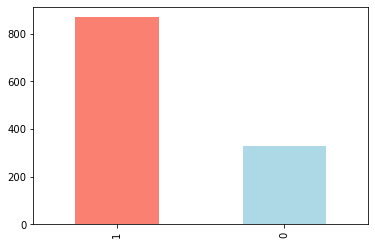

In [9]:
# Let's visualize the value counts with a bar graph
garempro2.target.value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightgreen"]);

#### Exploratory Data Analysis

I am combining a couple of independent variables, such as, `No of Workers per Team` and `Targeted Productivity` and then comparing them to our target variable `Productivity Class`.

This is because there are so many different targets given to teams with different number of workers and we want to know if they actually meet their targets or not and what factors influence them in meeting their targets.

We will use different plots to visualize and understand these better.

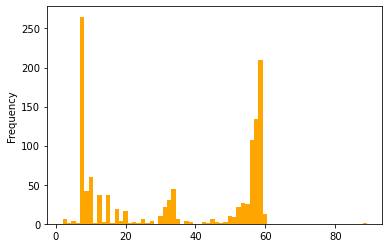

In [10]:
# Histograms are a great way to check the distribution of a variable
# Let's check the distribution of number of workers per team.
garempro2.no_of_workers.plot.hist(bins=70, color="orange");

The above graph shows that teams with higher number of workers (50 - 60) are more than teams with lower number of workers.

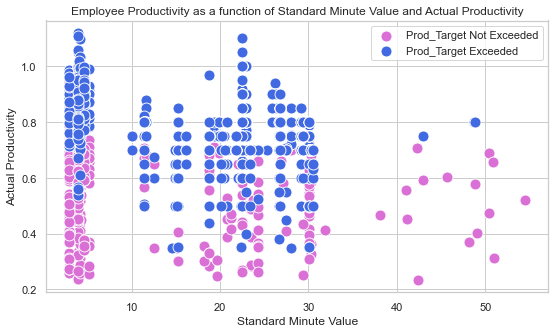

In [11]:
# Create a figure and style to plot a scatter plot.
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))

# Start with 'not met' productivity (0)
sns.scatterplot(garempro2.smv[garempro2.target==0], 
            garempro2.actual_productivity[garempro2.target==0],
            color="orchid", marker='o', s=120) 

# Then add 'fully met' productivity (1)
sns.scatterplot(garempro2.smv[garempro2.target==1], 
            garempro2.actual_productivity[garempro2.target==1],
            color="royalblue", marker='o', s=120) 

# Add some relevant info
plt.title("Employee Productivity as a function of Standard Minute Value and Actual Productivity")
plt.xlabel("Standard Minute Value")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'upper right')
plt.ylabel("Actual Productivity");

We can infer from the above plot that:

- with the low amount of time allocated to tasks, more productivity targets were not met than were exceeded. As more time (x -axis, 10 - 30) gets allocated to tasks, actual productivity was exceeded more. However at time 40 - 55, productivity targets were mostly not met. This could be due to idle time.

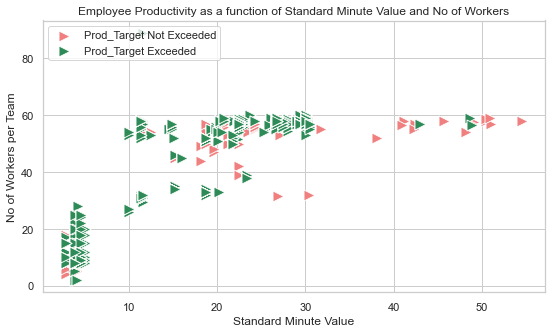

In [12]:
plt.figure(figsize=(9,5))

# Start with 'not met' productivity (0)
sns.scatterplot(garempro2.smv[garempro2.target==0], 
            garempro2.no_of_workers[garempro2.target==0],
            color="lightcoral", marker='>', s=120) 

# Then add 'fully met' productivity (1)
sns.scatterplot(garempro2.smv[garempro2.target==1], 
            garempro2.no_of_workers[garempro2.target==1], 
            color="seagreen", marker='>', s=120) # define it as a scatter figure

# Add some helpful info
plt.title("Employee Productivity as a function of Standard Minute Value and No of Workers")
plt.xlabel("Standard Minute Value")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'upper left')
plt.ylabel("No of Workers per Team");

From the above we can observe that:

- it is ‘a rifle shaped scatter matrix’, that compares the impact that the number of workers in a team has on productivity, based on the time allocated to tasks. 
- The data reveals that low number of workers require few minutes of time to exceed productivity targets. However, as the time allocated to tasks increases simultaneously with the number of workers, productivity targets are impacted negatively. - Eventually, where many workers are given so much time for tasks, productivity targets are largely not met. This could be due to idle men. 
- We can conclude that actual productivity is optimized where few number of workers are allocated with less time to task.

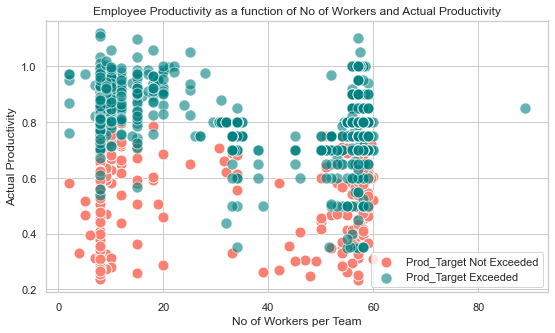

In [13]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")

# Start with 'not met' productivity (0)
sns.scatterplot(garempro2.no_of_workers[garempro2.target==0], 
            garempro2.actual_productivity[garempro2.target==0],
            color="salmon", marker='o', s=120) 

# We also want 'exceeded' productivity targets (2) on the same plot, so we call plot again.
sns.scatterplot(garempro2.no_of_workers[garempro2.target==1], 
            garempro2.actual_productivity[garempro2.target==1], 
            color="teal", marker='o', s=120, alpha=0.6)

plt.title("Employee Productivity as a function of No of Workers and Actual Productivity")
plt.xlabel("No of Workers per Team")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'lower right')
plt.ylabel("Actual Productivity");

From above, we see that:

1. Teams with high workers had the lowest actual productivity values. This could be due to idle time or men.
This analysis helps us to build an understanding of the data.

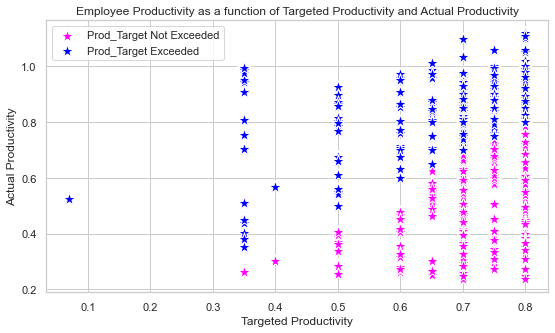

In [14]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")

# Start with 'not met' productivity (0)
sns.scatterplot(garempro2.targeted_productivity[garempro2.target==0], 
            garempro2.actual_productivity[garempro2.target==0],
            color="fuchsia", marker='*', s=180) 

# We also want 'exceeded' productivity targets (2) on the same plot, so we call plot again.
sns.scatterplot(garempro2.targeted_productivity[garempro2.target==1], 
            garempro2.actual_productivity[garempro2.target==1], 
            color="blue", marker='*', s=180)

plt.title("Employee Productivity as a function of Targeted Productivity and Actual Productivity")
plt.xlabel("Targeted Productivity")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'upper left')
plt.ylabel("Actual Productivity");

From the above plot, we can deduce that there is an inverse relationship between Targeted Productivity and Actual Productivity. 

Hence, the higher the targets, the lower the actual productivity. The reasonability of productivity targets needs to be examined as well as other influencing factors.

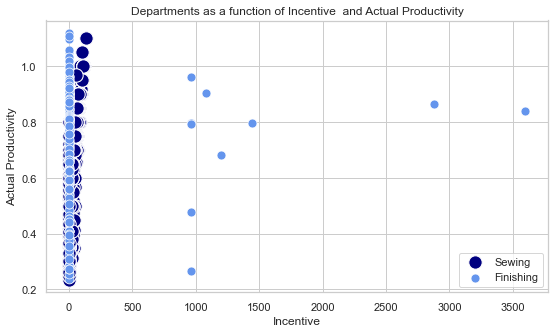

In [15]:
# Create another figure to plot a bar graph
plt.figure(figsize=(9,5))

# Start with 'sewing' department
sns.scatterplot(garempro2.incentive[garempro2.department=='sweing'], 
            garempro2.actual_productivity[garempro2.department=='sweing'],
            color="navy", s=180) 

# Then add 'finishing' department
sns.scatterplot(garempro2.incentive[garempro2.department=='finishing'], 
            garempro2.actual_productivity[garempro2.department=='finishing'],
            color="cornflowerblue", s=80) 

# Add the relevant info
plt.title("Departments as a function of Incentive  and Actual Productivity")
plt.xlabel("Incentive")
plt.legend(["Sewing", "Finishing"], loc = 'lower right')
plt.ylabel("Actual Productivity");

- The finishing department is largely on a zero incentive basis but seems to receive incentives in thousands when they do. 

- However, the sewing department has a lower but progressive range policy. We will examine this deeper in the next plot.

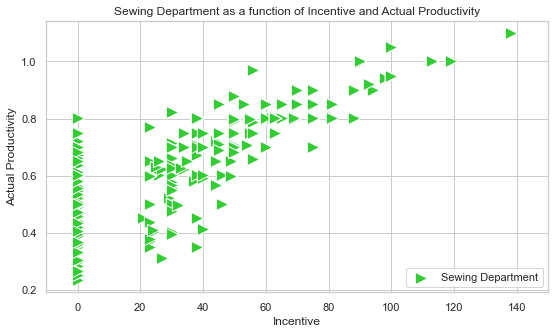

In [16]:
# Create another figure to plot a bar graph
plt.figure(figsize=(9,5))

# Start with 'sewing' department
sns.scatterplot(garempro2.incentive[garempro2.department=='sweing'], 
            garempro2.actual_productivity[garempro2.department=='sweing'],
            color="limegreen",marker='>', s=150) 

 
plt.xlim(-10,150)
# Add the relevant info
plt.title("Sewing Department as a function of Incentive and Actual Productivity")
plt.xlabel("Incentive")
plt.legend(["Sewing Department"], loc = 'lower right')
plt.ylabel("Actual Productivity");

Incentive is expected to be the most correlated attribute to actual_productivity based on intuition. 

However, from the chart above the **Sewing** department are clearly incentive driven, but the **Finishing** department seem to be on a one-off incentive program.

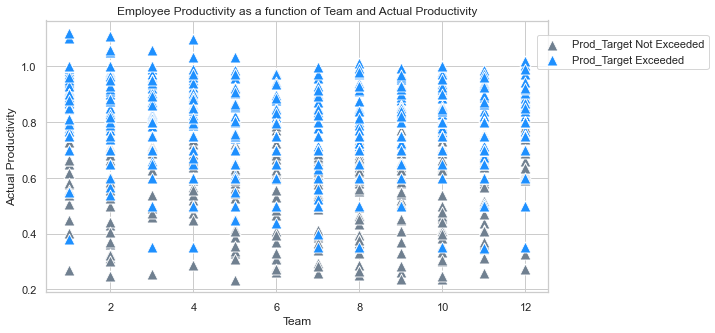

In [17]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")

# Start with 'not met' productivity (0)
sns.scatterplot(garempro2.team[garempro2.target==0], 
            garempro2.actual_productivity[garempro2.target==0],
            color="slategray", marker='^', s=120) 

# We also want 'exceeded' productivity targets (1) on the same plot, so we call plot again.
sns.scatterplot(garempro2.team[garempro2.target==1], 
            garempro2.actual_productivity[garempro2.target==1], 
            color="dodgerblue", marker='^', s=120)

plt.title("Employee Productivity as a function of Team and Actual Productivity")
plt.xlabel("Team")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'lower right', bbox_to_anchor=(1.33, 0.8))
plt.ylabel("Actual Productivity");

- From the above, Team 1 reached the highest productivity levels of almost 1.2 units.
- At 0.8 productivity score, all teams seem to exceed their productivity targets while most of the unmet targets were recorded at scores below 0.8

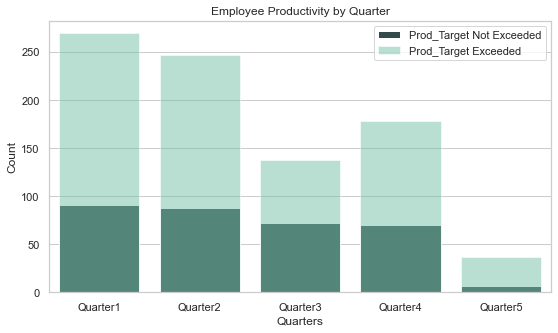

In [18]:
# Create another figure to plot a bar graph
plt.figure(figsize=(9,5))

# Start with 'not met' productivity (0)
sns.countplot(garempro2.quarter[garempro2.target==0], 
            color="darkslategrey") 

# We also want 'exceeded' productivity targets (2) on the same plot, so we call plot again.
sns.countplot(garempro2.quarter[garempro2.target==1], 
           color="mediumaquamarine", alpha=0.5)

# Add the relevant info
plt.title("Employee Productivity by Quarter")
plt.xlabel("Quarters")
plt.legend(["Prod_Target Not Exceeded", "Prod_Target Exceeded"], loc = 'upper right')
plt.ylabel("Count");

We can infer from the above plot that:
1. Quarter 5 is the least productive month.
2. Productivity Targets were exceeded the most in the 1st and 2nd Quarters

I am using the describe function to gain some statistical understanding of the dataframe
For example attributes with a high standard deviation from the mean indicates high level of variability.

In [19]:
garempro2.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,0.725982
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,0.446205
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,0.000000
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,0.000000
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,1.000000
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,1.000000
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,1.000000


I have observed that there is no single unique identifier for the teams in the dataset.

Hence, I am creating a unique identifier using the 5 columns that help to distinguish each team.

In [20]:
def convert_to_string(garempro2, columns):
    """ Conversion of columns to 
    string to create unique identifier"""
    for col in columns:
        garempro2[col] = garempro2[col].astype(str)
        
    return garempro2

In [21]:
# I am converting the 'team' column below to string format using the function defined above
col_convert = ['team']
garempro2 = convert_to_string(garempro2, col_convert)
print(garempro2.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                      object
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
target                     int32
dtype: object


In [22]:
# I am creating a new column which will be the unique identifer (team_id) using the 5 columns below.
garempro2['team_id'] = garempro2['date'] + garempro2['quarter'] + garempro2['department'] + garempro2['day'] + garempro2['team']
print(garempro2)

           date   quarter  department        day team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday    8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday    1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday   11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday   12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday    6                   0.80   
...         ...       ...         ...        ...  ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday   10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday    8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday    7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday    9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday    6                   0.70   

        smv  over_time  incentive  idle

In [23]:
# I am rearranging the columns and creating a new dataframe
garempro3 = garempro2[['team_id', 'quarter', 'department', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
               'no_of_style_change', 'no_of_workers', 'actual_productivity', 'target']]
garempro3.head()

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,1/1/2015Quarter1sweingThursday8,Quarter1,sweing,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,1/1/2015Quarter1finishing Thursday1,Quarter1,finishing,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,1/1/2015Quarter1sweingThursday11,Quarter1,sweing,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,1/1/2015Quarter1sweingThursday12,Quarter1,sweing,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,1/1/2015Quarter1sweingThursday6,Quarter1,sweing,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


### Correlation between independent variables

We'll compare all of the independent variables in one hit.

This is because it may give an idea of which independent variables may or may not have an impact on our target variable.
It also tells us how related each variable is the other.

In [24]:
# Find the correlation between our independent variables
corr_matrix = garempro3.corr()
corr_matrix 

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
targeted_productivity,1.000000,-0.069489,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594,-0.006328
smv,-0.069489,1.000000,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089,0.142027
over_time,-0.088557,0.674887,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206,0.172005
incentive,0.032768,0.032629,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538,0.068482
idle_time,-0.056181,0.056863,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851,-0.057132
idle_men,-0.053818,0.105901,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734,-0.146678
no_of_style_change,-0.209294,0.315388,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366,0.001416
no_of_workers,-0.084288,0.912176,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991,0.233583
actual_productivity,0.421594,-0.122089,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000,0.652221
target,-0.006328,0.142027,0.172005,0.068482,-0.057132,-0.146678,0.001416,0.233583,0.652221,1.000000


Text(0.5, 1.0, 'Employee Productivity Correlation Coefficient')

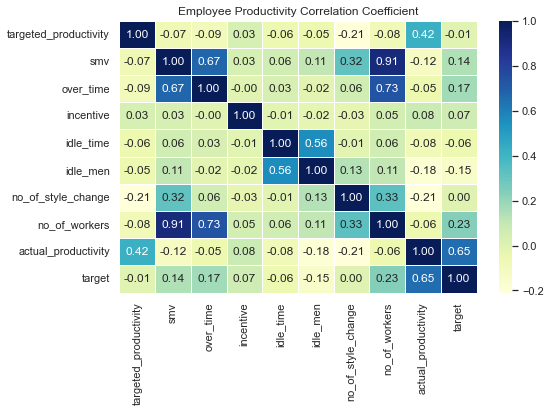

In [25]:
# Let's make it look a little prettier
corr_matrix = garempro3.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");
plt.title("Employee Productivity Correlation Coefficient")

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

In [26]:
garempro4 = pd.DataFrame(garempro3)

# Columns to convert
categorical_columns = ["team_id", "quarter", "department"]

# Convert categorical columns to numerical using LabelEncoder in preparation for modelling.
le = LabelEncoder()
for column in categorical_columns:
    garempro4[column] = le.fit_transform(garempro4[column])
    print(garempro4)

      team_id   quarter  department  targeted_productivity    smv  over_time  \
0          17  Quarter1      sweing                   0.80  26.16       7080   
1           0  Quarter1  finishing                    0.75   3.94        960   
2           9  Quarter1      sweing                   0.80  11.41       3660   
3          10  Quarter1      sweing                   0.80  11.41       3660   
4          15  Quarter1      sweing                   0.80  25.90       1920   
...       ...       ...         ...                    ...    ...        ...   
1192     1029  Quarter2   finishing                   0.75   2.90        960   
1193     1038  Quarter2   finishing                   0.70   3.90        960   
1194     1037  Quarter2   finishing                   0.65   3.90        960   
1195     1039  Quarter2   finishing                   0.75   2.90       1800   
1196     1036  Quarter2   finishing                   0.70   2.90        720   

      incentive  idle_time  idle_men  n

In [27]:
garempro4.head()

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,17,0,2,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,0,0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,9,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,10,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,15,0,2,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


### PCA Analysis

- This analysis helps to identify the important features with the greatest variance
- It places them in the principal component 1 (PC 1) box, and that with the second greatest variance in PC 2 etc.

In [28]:
garempro4.target.value_counts()

1    869
0    328
Name: target, dtype: int64

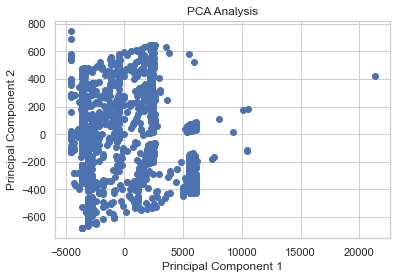

In [29]:
# PCA analysis for unscaled data
pca = PCA(n_components=3)  # Reduce the dimensionality to 3
pca_result = pca.fit_transform(garempro4)

# Plotting the results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.show()

#### Scaling the dataset

- The reason we scale the dataset is to ensure that all features contribute equally to the learning process before modelling.

- It also prevents some features from dominating others due to their larger scales. 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(garempro4)
garempro_scaled = scaler.transform(garempro4)

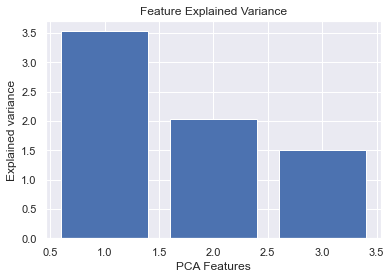

In [31]:
sns.set()
 
# Reduce to 3 features with PCA
pca = PCA(n_components=3)
 
# Fit and transform data
pca.fit_transform(garempro_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1), pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Scree Plot

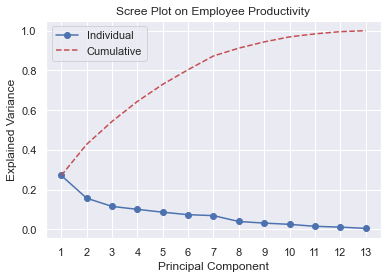

In [32]:
def scree_plot(garempro_scaled):
    # Calculate eigenvalues
    cov_matrix = np.cov(garempro_scaled.T)
    eigenvalues, _ = np.linalg.eig(cov_matrix)

    # Calculate explained variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    # Sort the explained variance in descending order
    sorted_variance = np.sort(explained_variance)[::-1]

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(sorted_variance)

    # Plot the scree plot
    plt.plot(np.arange(1, len(explained_variance) + 1), sorted_variance, 'o-')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.title('Scree Plot on Employee Productivity')
    plt.xticks(np.arange(1, len(explained_variance) + 1))
    plt.grid(True)

    # Plot cumulative explained variance as a dashed line
    plt.plot(np.arange(1, len(explained_variance) + 1), cumulative_variance, 'r--')
    plt.legend(['Individual', 'Cumulative'])
    plt.show()

scree_plot(garempro_scaled)


1. The scree plot is a graphical tool used in Principal Component Analysis (PCA) to analyze the attributes of employee productivity. 

2. We can use it to understand the variance explained by each PC and to assess the importance and contribution of each attribute in the employee productivity dataset.

3. From the above, we can see the proportion of explained variance on the y-axis and the corresponding PCs on the x-axis. 

4. The eigenvalues (y-axis) represent the amount of variance captured by each PC. A larger eigenvalue indicates that the PC explains a greater proportion of the total variance.

5. Since significant PCs have large eigenvalues and vice versa, the point at which the eigenvalues drop significantly is often considered a cut-off point for determining the number of significant PCs to retain. We choose point 2 in this instance.

6. We can also assess the importance of each attribute in the dataset. Attributes that contribute more to the total variance will have larger eigenvalues and appear higher on the scree plot.

In [33]:
def calculate_eigenvalues(garempro_scaled):
    # Calculate the covariance matrix or correlation matrix
    cov_matrix = np.cov(garempro_scaled.T)  # Covariance matrix
    # corr_matrix = np.corrcoef(data.T)  # Correlation matrix

    # Calculate the eigenvalues
    eigenvalues, _ = np.linalg.eig(cov_matrix)

    return eigenvalues

attribute_names = ['team_id', 'quarter', 'department', 'targeted_productivity', 'smv', 'over_time',
                   'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'target']
eigenvalues = calculate_eigenvalues(garempro_scaled)

# View the eigenvalues of each attribute
for i, (attribute, eigenvalue) in enumerate(zip(attribute_names, eigenvalues)):
    print(f"{attribute}: {eigenvalue}")


team_id: 3.5268258243460355
quarter: 2.03979019952656
department: 1.5014665106615348
targeted_productivity: 1.30895903072954
smv: 1.1216744302792776
over_time: 0.9591148130545327
incentive: 0.8982410472318014
idle_time: 0.5132212938097656
idle_men: 0.06304537042463632
no_of_style_change: 0.14421788503892977
no_of_workers: 0.19826394695655583
actual_productivity: 0.40865431387636014
target: 0.32739489928186627


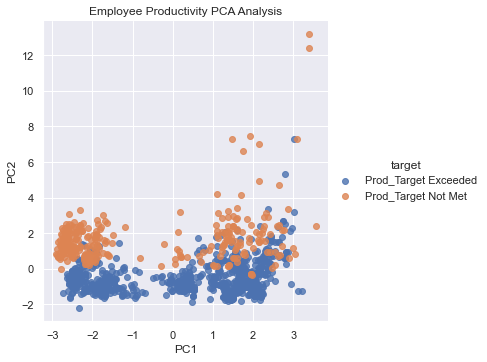

In [34]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(garempro_scaled)
pca_garempro = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])
target_names = {
    1:'Prod_Target Exceeded',
    0:'Prod_Target Not Met'}
y = garempro4.target
pca_garempro['target'] = y
pca_garempro['target'] = pca_garempro['target'].map(target_names)
sns.set()
sns.lmplot(x='PC1', y='PC2', data=pca_garempro, hue='target', fit_reg=False, legend=True)

plt.title('Employee Productivity PCA Analysis')
plt.show()

### PCA Correlation Coefficients

In [35]:
# Calculate PCA correlation coefficients
corre_matrix = pd.DataFrame(
    data=pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=garempro4.columns)

# Reduce to 4 decimal places
corre_matrix = corre_matrix.round(4)

# Sort coefficients in descending order
corre_matrix = corre_matrix.sort_values(by='PC1', ascending=False)
print("PCA Correlation Coefficients:")
print(corre_matrix)

PCA Correlation Coefficients:
                          PC1     PC2     PC3
no_of_workers          0.5128 -0.0268  0.0518
smv                    0.4931  0.0168  0.0326
department             0.4822 -0.0700 -0.0100
over_time              0.4244 -0.0899 -0.0885
no_of_style_change     0.2035  0.2425 -0.0832
target                 0.1351 -0.4768  0.1880
idle_men               0.0741  0.3817  0.4434
idle_time              0.0508  0.2920  0.4954
quarter                0.0299  0.0426 -0.4360
incentive              0.0092 -0.0829  0.1831
team_id               -0.0517  0.1645  0.3735
actual_productivity   -0.0534 -0.5775  0.2754
targeted_productivity -0.0839 -0.3157  0.2550


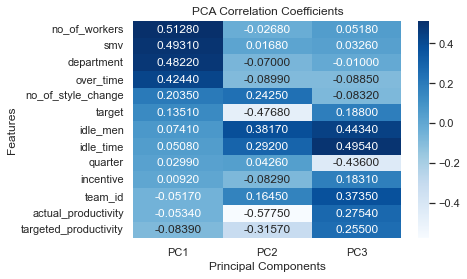

In [36]:
sns.heatmap(corre_matrix, cmap='Blues', annot=True, fmt=".5f")
plt.title("PCA Correlation Coefficients")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()

From the above PCA results:
- We can visualize the coefficients of the original variables in the principal components in order to know their contribution to each component's variation. 
- Variables with larger coefficients such as no. of workers, smv and overtime in PC1 are considered more important in explaining the data variance. 

### 3D PCA

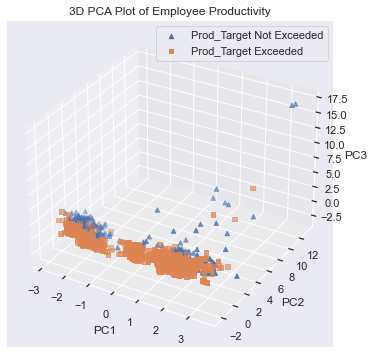

In [37]:
# Perform PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(garempro_scaled)

# Create a DataFrame for the 3D PCA plot
pca_garempro = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
target_names = {
    0: 'Prod_Target Not Exceeded',
    1: 'Prod_Target Exceeded'
}
y = garempro4.target
pca_garempro['target'] = y
pca_garempro['target_names'] = pca_garempro['target'].map(target_names)

# Create the 3D PCA plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
targets = np.unique(y)

markers = ['^', 's', 'o']  # Specify the marker types here

for target, marker in zip(targets, markers):
    indices = pca_garempro['target'] == target
    ax.scatter(
        pca_garempro.loc[indices, 'PC1'],
        pca_garempro.loc[indices, 'PC2'],
        pca_garempro.loc[indices, 'PC3'],
        marker=marker,  # Set the marker type
        label=target_names[target]
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot of Employee Productivity')
ax.legend()
plt.show()


1. In this 3D PCA plot, the three axes correspond to three selected principal components weighted by their respective coefficients.

2. This plot helps us visualize the ordering of the PCs by their importance, with the first principal component capturing the largest amount of variance in the dataset.

3. The major benefit of this plot is that it helps us to visualize how the data points are distributed in this reduced-dimensional space.

4. In addition to this, it reveals some sort of clustering or separation based on the values along the 3 PCs. We can see a cluster around (-1, -3) and (0, 2) on PC1 axis and around points (8, 12) along PC2 axis.

### Biplot

C:\Users\hp\AppData\Local\Temp\ipykernel_9016\443257235.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(0, 0, principal_components[i, 0]*1.5, principal_components[i, 1]*1.5,


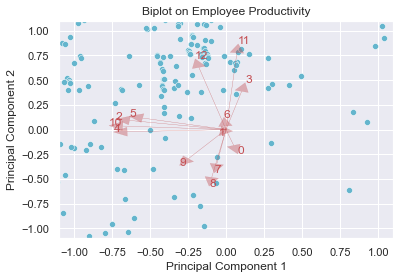

Column 0: team_id
Column 1: quarter
Column 2: department
Column 3: targeted_productivity
Column 4: smv
Column 5: over_time
Column 6: incentive
Column 7: idle_time
Column 8: idle_men
Column 9: no_of_style_change
Column 10: no_of_workers
Column 11: actual_productivity
Column 12: target


In [38]:
def biplot(garempro_scaled, labels=None, arrow_size=0.09, arrow_style='->', text_size=10, scale=0.5):
    # Calculate covariance matrix and perform PCA
    cov_matrix = np.cov(garempro_scaled.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvectors and eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Keep only the first two principal components
    principal_components = sorted_eigenvectors[:, :2]

    # Project the data onto the principal components
    projected_data = np.dot(garempro_scaled, principal_components)

    # Plot the data points
    sns.scatterplot(projected_data[:, 0], projected_data[:, 1], color='c')

    # Plot the attribute loadings as arrows
    attribute_labels = range(garempro_scaled.shape[1]) if labels is None else labels
    for i, attribute in enumerate(attribute_labels):
        plt.arrow(0, 0, principal_components[i, 0]*1.5, principal_components[i, 1]*1.5,
                  color='r', alpha=0.4, head_width=arrow_size, head_length=arrow_size,
                  length_includes_head=True, linestyle='-', linewidth=0.5*scale, edgecolor='r')
        plt.text(principal_components[i, 0]*1.5, principal_components[i, 1]*1.5,
                 str(attribute), color='r')

    # Set plot labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Biplot on Employee Productivity')
    
    # Set plot scaling
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.grid(True)
    plt.show()

biplot(garempro_scaled, arrow_size=0.09, arrow_style='->', text_size=12, scale=.5)
for i, column in enumerate(garempro4.columns):
    print(f'Column {i}: {column}')

- In the above biplot, the observations are represented as points while the features are represented by the arrows. The length and direction of the arrows indicate the importance and direction of the features in the productivity dataset.

- The biplot has been created for the following reasons:

1. **Observation of Proximity**: The proximity of the points to each other shows the similarity or dissimilarity between observations. For example, points 2,4,5 and 10 that are closer together indicate similar patterns, while points 12 and 9 that are farther apart indicate differences.

2. **Fearture Importance**: The direction and length of the arrows indicate the contribution and relevance of each attribuite to the overall data structure. The longer arrows like point 3 (targeted productivity), 6 (incentive), and 11 (actual productivity) indicate variables that have more influence on the dataset's variability. 
- From our EDA earlier on, we noted a wide variability in the incentive attribute where employees in the Sewing department received incentives between 0 - 140 while employees in the Finishing department gor incentives between 1000 - 3600. 
- Similary, we deduced that there was an inverse relationship between Targeted Productivity and Actual Productivity.
- In addition, if the angle between the arrows are short such as that between points 4 (SMV), and 10 (No of workers), it means that the variables are positively correlated. We can attest to this from the EDA that the higher the standard minute of value (time allocated to the task), the higher the number of workers in the team.

### Clustering

- K-means clustering allows us to group similar data points together based on their features. 
- Each cluster represents a distinct group.
- The cluster centers represent the average position of the data points within each cluster.

In [39]:
from sklearn.cluster import KMeans
X = garempro4[['no_of_workers', 'target']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


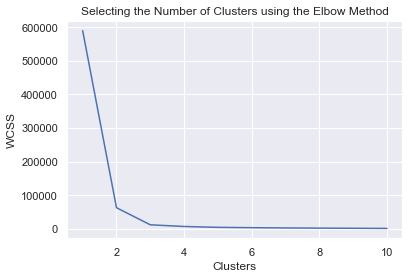

In [40]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

2

In [42]:
garempro4.columns

Index(['team_id', 'quarter', 'department', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'target'],
      dtype='object')

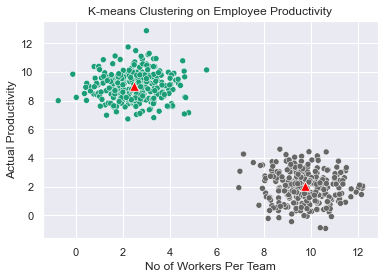

In [43]:
from sklearn.datasets import make_blobs
data = garempro4.values[:, [10, 11]]
data, threshold = make_blobs(n_samples=600, centers=2, random_state=42)

# Define the number of clusters
k = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Adjust cluster centers
shift_value = 5 
data[:, 0] += shift_value
centers[:, 0] += shift_value

# Create a scatter plot
sns.scatterplot(data[:, 0], data[:, 1], c=labels, cmap='Dark2')
sns.scatterplot(centers[:, 0], centers[:, 1], marker='^', s=90, color='red')


plt.xlabel('No of Workers Per Team')
plt.ylabel('Actual Productivity')
plt.title('K-means Clustering on Employee Productivity')
plt.show()

From the above clustering, we have used the elbow method to ascertain the appropriate number of clusters to be adopted and this produced 2 clusters.

The clustering results represent a group of similar data points based on their features. 

In this comparison between the **number of workers** and **actual productivity**, we can identify 2 groups:
1. A cluster that has low number of workers per team and high productivity.
2. Another group with high number of workers with low productivity.
3. Reasons for this contrast have been reviewed in the light of other attributes such as incentive and idle time which influences employee productivity.

This clustering position can be justified in the second scatter plot above titled **"Employee Productivity as a function of No of Workers and Actual Productivity"**.

## Modelling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 11 independent variables.

And remember our evaluation metric?

> If we can reach 80% accuracy at predicting productivity classes we'll adopt this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [44]:
# set up random seed and create the X and y (train and test datasets)
np.random.seed(42)
X = garempro4.drop(["target", "actual_productivity"], axis=1)
y = garempro4["target"]
X.head()

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,17,0,2,0.80,26.16,7080,98,0.0,0,0,59.0
1,0,0,1,0.75,3.94,960,0,0.0,0,0,8.0
2,9,0,2,0.80,11.41,3660,50,0.0,0,0,30.5
3,10,0,2,0.80,11.41,3660,50,0.0,0,0,30.5
4,15,0,2,0.80,25.90,1920,50,0.0,0,0,56.0


In [45]:
garempro4.head()

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,17,0,2,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,0,0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,9,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,10,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,15,0,2,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [46]:
garempro4['target'].value_counts()

1    869
0    328
Name: target, dtype: int64

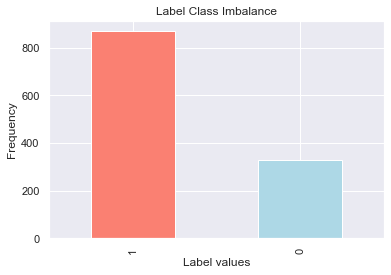

In [47]:
# imbalance of labels
garempro4.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title('Label Class Imbalance')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((957, 11), (240, 11), (957,), (240,))

In [50]:
X_train

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
1189,1050,1,2,0.70,30.48,6840,30,0.0,0,1,57.0
575,733,0,1,0.75,3.94,2280,0,0.0,0,0,19.0
76,456,0,1,0.75,2.90,960,0,0.0,0,0,8.0
731,602,1,0,0.70,4.15,1800,0,0.0,0,0,15.0
138,533,1,2,0.80,11.61,15120,63,0.0,0,0,31.5
...,...,...,...,...,...,...,...,...,...,...,...
1044,1078,0,0,0.70,4.60,3360,0,0.0,0,0,8.0
1095,1140,0,0,0.50,2.90,960,0,0.0,0,0,8.0
1130,1182,1,0,0.60,3.94,0,2880,0.0,0,0,12.0
860,730,2,2,0.75,30.10,0,0,5.0,20,1,59.0


In [51]:
y_train, len(y_train)

(1189    1
 575     0
 76      1
 731     1
 138     1
        ..
 1044    0
 1095    1
 1130    1
 860     0
 1126    0
 Name: target, Length: 957, dtype: int32,
 957)

In [52]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dt_scaler = scaler.fit(X_train)
sc_X_train = dt_scaler.transform(X_train)
sc_X_test = dt_scaler.transform(X_test)

In [53]:
# Balancing the data sets
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(sc_X_train, y_train,)

In [54]:
y_train.value_counts()

1    694
0    694
Name: target, dtype: int64

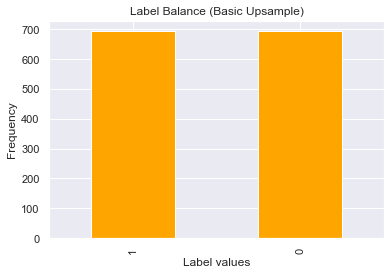

In [55]:
y_train.value_counts().plot(kind='bar', color='orange')
plt.title('Label Balance (Basic Upsample)')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

In [56]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: target, dtype: int32

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Random Forest
2. Logistic Regression
3. LinearSVC 

In [57]:
# Put models in a dictionary
models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Linear SVC": LinearSVC(max_iter=10000)}

# Create function to fit and score models
def fit_and_score(models, X_train, sc_X_test, y_train, y_test):
    """
    Fits and evaluates the chosen machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    sc_X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(sc_X_test, y_test)
    return model_scores

In [58]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             sc_X_test=sc_X_test,
                             y_train=y_train,
                             y_test=y_test
                             )
model_scores

{'Random Forest': 0.8583333333333333,
 'Logistic Regression': 0.6708333333333333,
 'Linear SVC': 0.6708333333333333}

Beautiful! Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

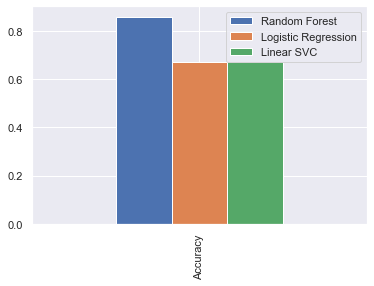

In [59]:
# Comparing the models
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.plot.bar();

From the graph, we can see that the Random Forest model performs best.

### Hyperparameters

- Each model we use has a series of dials that we can turn to dictate how they perform. 
- Changing these values may increase or decrease model performance.
- However, our model scores are quite high and may not need tuning.

## Evaluating a classification model, beyond accuracy

### Classification report

A classification report will give us information of the precision and recall of our model for each class

* **Precision** - This metric indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* **Recall** - This indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* **Support** - The number of samples each metric was calculated on.

* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. 

* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


#### Experiment with cross validation
Cross-validation evaluates the model's performance on different subsets of the data

1. It helps in estimating how well the model will perform on unseen data. 
2. The primary purpose of cross-validation is to provide a more reliable and unbiased estimate of the model's performance
3. The cross_val_score function from sklearn.model_selection module performs cross-validation by splitting the data into specified number of folds (cv=5 indicates 5-fold cross-validation) and returns an array of scores for each fold. 
4. Finally, we print the individual cross-validation scores and the mean score across all folds.

In [60]:
# Create a random forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
rf_model.fit(X_train, y_train)

Fold 1 Score: 0.8920863309352518
Fold 2 Score: 0.9028776978417267
Fold 3 Score: 0.9172661870503597
Fold 4 Score: 0.927797833935018
Fold 5 Score: 0.8953068592057761
Best Fold: 4
Mean CV Score: 0.9070669817936265


RandomForestClassifier()

In [61]:
# Create a random forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)  # cv=10 for 10-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
rf_model.fit(X_train, y_train)

Fold 1 Score: 0.8920863309352518
Fold 2 Score: 0.9136690647482014
Fold 3 Score: 0.9568345323741008
Fold 4 Score: 0.8776978417266187
Fold 5 Score: 0.9496402877697842
Fold 6 Score: 0.935251798561151
Fold 7 Score: 0.8992805755395683
Fold 8 Score: 0.9640287769784173
Fold 9 Score: 0.927536231884058
Fold 10 Score: 0.8768115942028986
Best Fold: 8
Mean CV Score: 0.9192837034720049


RandomForestClassifier()

#### Making Predictions
Why are our scores different?

1. The variations in the subsets used for training and testing during cross-validation can lead to slightly different results compared to evaluating the model on a single test set. 

2. The model prediction score represents the performance on a specific test set, while the cross-validation score provides an average performance across multiple subsets.

In [62]:
# Make predictions on test data for Random Forest
# Setup random seed
np.random.seed(42)

# Instantiate Random Forest
#rf_model = RandomForestClassifier()
#rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(sc_X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Model Accuracy Score: {rf_model.score(sc_X_test, y_test)*100:.2f}%", "\n")
print("----------------------------------")
print(f"Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Model Accuracy Score: 82.92% 

----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.71        65
           1       0.90      0.86      0.88       175

    accuracy                           0.83       240
   macro avg       0.78      0.81      0.79       240
weighted avg       0.84      0.83      0.83       240



#### Experiment with cross validation

In [63]:
# Create a logistic Regression
lr_model = LogisticRegression(max_iter=10000)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
lr_model.fit(X_train, y_train)

Fold 1 Score: 0.7230215827338129
Fold 2 Score: 0.6870503597122302
Fold 3 Score: 0.7158273381294964
Fold 4 Score: 0.703971119133574
Fold 5 Score: 0.6462093862815884
Best Fold: 1
Mean CV Score: 0.6952159571981403


LogisticRegression(max_iter=10000)

In [64]:
# Create a logistic Regression
lr_model = LogisticRegression(max_iter=10000)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10)  # cv=10 for 10-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
lr_model.fit(X_train, y_train)

Fold 1 Score: 0.697841726618705
Fold 2 Score: 0.7913669064748201
Fold 3 Score: 0.6618705035971223
Fold 4 Score: 0.6906474820143885
Fold 5 Score: 0.7338129496402878
Fold 6 Score: 0.7050359712230215
Fold 7 Score: 0.7122302158273381
Fold 8 Score: 0.6906474820143885
Fold 9 Score: 0.6594202898550725
Fold 10 Score: 0.6376811594202898
Best Fold: 2
Mean CV Score: 0.6980554686685434


LogisticRegression(max_iter=10000)

#### Making Predictions

In [65]:
# Make predictions on test data for Logistic Regression
# Setup random seed
np.random.seed(42)

# Instantiate Logistic Regression
#lr_model = LogisticRegression()
#lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(sc_X_test)

# Calculate accuracy score
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Model Accuracy Score: {lr_model.score(sc_X_test, y_test)*100:.2f}%", "\n")
print("----------------------------------")
print(f"Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Model Accuracy Score: 67.08% 

----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.57      0.48        65
           1       0.82      0.71      0.76       175

    accuracy                           0.67       240
   macro avg       0.62      0.64      0.62       240
weighted avg       0.71      0.67      0.68       240



#### Experiment with cross validation

In [66]:
# Create a Linear SVC
lsvc_model = LinearSVC(max_iter=10000)

# Perform cross-validation
cv_scores = cross_val_score(lsvc_model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
lsvc_model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold 1 Score: 0.7158273381294964
Fold 2 Score: 0.6870503597122302
Fold 3 Score: 0.7122302158273381
Fold 4 Score: 0.6859205776173285
Fold 5 Score: 0.6353790613718412
Best Fold: 1
Mean CV Score: 0.687281510531647


LinearSVC(max_iter=10000)

In [67]:
# Create a Linear SVC
lsvc_model = LinearSVC(max_iter=10000)

# Perform cross-validation
cv_scores = cross_val_score(lsvc_model, X_train, y_train, cv=10)  # cv=10 for 10-fold cross-validation

# Track the scores for each fold
fold_scores = []

for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} Score: {score}")
    fold_scores.append(score)

# Identify the fold with the highest score
best_fold_index = fold_scores.index(max(fold_scores))
best_fold = best_fold_index + 1
print("Best Fold:", best_fold)
print("Mean CV Score:", cv_scores.mean())
# Train the model on the entire dataset using the best fold
lsvc_model.fit(X_train, y_train)

Fold 1 Score: 0.6834532374100719
Fold 2 Score: 0.7697841726618705
Fold 3 Score: 0.6618705035971223
Fold 4 Score: 0.6834532374100719
Fold 5 Score: 0.7194244604316546
Fold 6 Score: 0.7122302158273381
Fold 7 Score: 0.7050359712230215
Fold 8 Score: 0.6906474820143885
Fold 9 Score: 0.6521739130434783
Fold 10 Score: 0.6376811594202898
Best Fold: 2
Mean CV Score: 0.6915754353039308


LinearSVC(max_iter=10000)

#### Making Predictions

In [68]:
# Make predictions on test data for LinearSVC
# Setup random seed
np.random.seed(42)

# Instantiate LinearSVC
#lsvc_model = LinearSVC(max_iter=10000)
#lsvc_model.fit(X_train, y_train)
lsvc_preds = lsvc_model.predict(sc_X_test)

# Calculate accuracy score
print(f"LinearSVC Model Accuracy Score: {lsvc_model.score(sc_X_test, y_test)*100:.2f}%")
print("----------------------------------")
print(f"Classification Report:\n", classification_report(y_test, lsvc_preds))

LinearSVC Model Accuracy Score: 67.08%
----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49        65
           1       0.82      0.70      0.76       175

    accuracy                           0.67       240
   macro avg       0.62      0.64      0.62       240
weighted avg       0.71      0.67      0.68       240



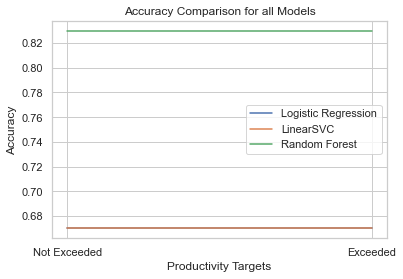

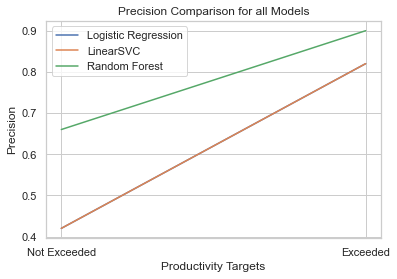

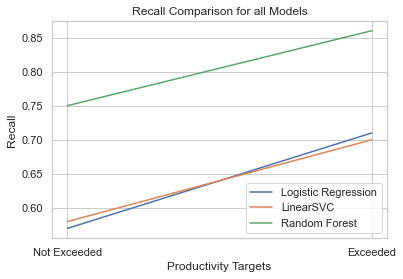

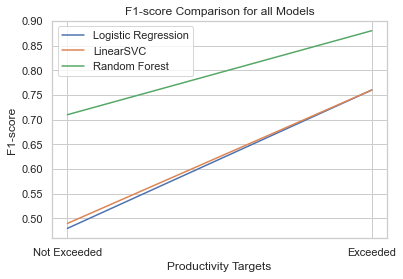

In [69]:
sns.set(style="whitegrid")
# Define the classes and metrics you want to plot
targets = ['Not Exceeded', 'Exceeded']
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Define the metrics for all models
rf_metrics = {
    'accuracy': [0.83, 0.83],
    'precision': [0.66, 0.90],
    'recall': [0.75, 0.86],
    'f1-score': [0.71, 0.88],
}

logreg_metrics = {
    'accuracy': [0.67, 0.67],
    'precision': [0.42, 0.82],
    'recall': [0.57, 0.71],
    'f1-score': [0.48, 0.76]
}
linsvc_metrics = {
    'accuracy': [0.67, 0.67],
    'precision': [0.42, 0.82],
    'recall': [0.58, 0.70],
    'f1-score': [0.49, 0.76]
}

# Plot the line graph
for metric in metrics:
    sns.lineplot(targets, logreg_metrics[metric], label='Logistic Regression')
    sns.lineplot(targets, linsvc_metrics[metric], label='LinearSVC')
    sns.lineplot(targets, rf_metrics[metric], label='Random Forest')
    plt.xlabel('Productivity Targets')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison for all Models')
    plt.legend()
    plt.show()


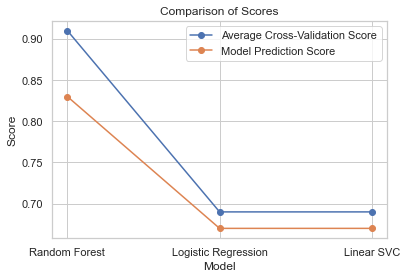

In [70]:
# Compare Average Cross Validation Score with Model Accuracy Scores
ave_cross_val_score = {
    'Random Forest': [0.91],
    'Logistic Regression': [0.69],
    'Linear SVC': [0.69]
}

model_acc_score = {
    'rf': [0.83],
    'lr': [0.67],
    'lsvc': [0.67]
}

# Extract the model names and scores
models = list(ave_cross_val_score.keys())
ave_scores = [score[0] for score in ave_cross_val_score.values()]
acc_scores = [score[0] for score in model_acc_score.values()]

# Plotting the line graph
plt.plot(models, ave_scores, marker='o', label='Average Cross-Validation Score')
plt.plot(models, acc_scores, marker='o', label='Model Prediction Score')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Scores')
plt.legend()

# Display the plot
plt.show()


## Making Predictions

In [71]:
# Make preidctions on test data
lr_preds[10:25]

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [72]:
lsvc_preds[10:25]

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [73]:
y_test[10:25]

572    1
44     1
49     1
844    1
240    1
170    1
732    1
761    1
723    1
422    1
714    1
593    1
660    1
873    0
109    1
Name: target, dtype: int32

They look like our original test data labels, except different where the model has predicred wrong

In [74]:
# Time taken to train using the linearSVC model.
%timeit lsvc_model.fit(X_train, y_train)

801 ms ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
# Time taken to predict using the linearSVC model.
%timeit lsvc_model.predict(sc_X_test)

153 µs ± 4.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [76]:
# Time taken to train using the logistic regression model.
%timeit lr_model.fit(X_train, y_train)

22.3 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
# Time taken to predict using the logistic regression model.
%timeit lr_model.predict(sc_X_test)

170 µs ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [78]:
# Time taken to train using the RandomForest model.
%timeit rf_model.fit(X_train, y_train)

461 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
# Time taken to predict using the RandomForest model.
%timeit rf_model.predict(sc_X_test)

30.7 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Confusion matrix 

- A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).
- It compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
- We create a function using Seaborn's heatmap

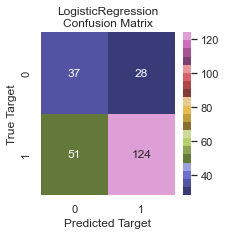

In [80]:
sns.set(font_scale=1) 
 
def confmat(y_test, lr_preds):
    """
    Plots a confusion matrix for Logistic Regression.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lr_preds),
                     annot=True, # Annotate the boxes
                     cmap='tab20b', fmt='g')
    plt.xlabel("Predicted Target") # predictions go on the x-axis
    plt.ylabel("True Target") # true labels go on the y-axis 
    plt.title("LogisticRegression\nConfusion Matrix")
confmat(y_test, lr_preds)

From above:
- We can see the model gets confused (predicts the wrong label) on few occassions across the three classes. 
- In essence, there are few cases where the model predicted 0 when it should've been 2 and occasions where the model predicted 1 instead of 2.

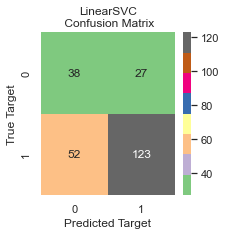

In [81]:
sns.set(font_scale=1) 
 
def confmat(y_test, lsvc_preds):
    """
    Plots a confusion matrix for Linear SVC.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lsvc_preds),
                     annot=True, # Annotate the boxes
                     cmap='Accent', fmt='g')
    plt.xlabel("Predicted Target") # predictions go on the x-axis
    plt.ylabel("True Target") # true labels go on the y-axis 
    plt.title("LinearSVC\n Confusion Matrix")
confmat(y_test, lsvc_preds)

The performance of the the Linear SVC model is almost perfect here.
- We can see the model gets confused in only 3 instances.
- It predicts 0 instead of 2, and predicts 2 instead of 0 and 1 respectively.

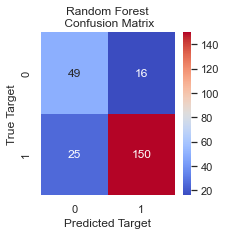

In [82]:
sns.set(font_scale=1) 
 
def confmat(y_test, rf_preds):
    """
    Plots a confusion matrix for Linear SVC.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rf_preds),
                     annot=True, # Annotate the boxes
                     cmap='coolwarm', fmt='g')
    plt.xlabel("Predicted Target") # predictions go on the x-axis
    plt.ylabel("True Target") # true labels go on the y-axis 
    plt.title("Random Forest\n Confusion Matrix")
confmat(y_test, rf_preds)

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"


In [83]:
garempro4.head()

,team_id,quarter,department,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,17,0,2,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,0,0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,9,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,10,0,2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,15,0,2,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [84]:
features = dict(zip(garempro4.columns, list(lr_model.coef_[0])))
sort_f = sorted(features.items(), key=lambda x: x[1], reverse=True)
sort_fd = pd.DataFrame(sort_f, columns=['Feature', 'Coefficient'])
sort_fd

,Feature,Coefficient
0,no_of_workers,1.203340
1,department,0.840815
2,idle_time,0.304090
3,team_id,0.231773
4,incentive,0.089951
5,targeted_productivity,0.071560
6,quarter,0.043948
7,over_time,-0.226247
8,no_of_style_change,-0.264209
9,idle_men,-0.656084


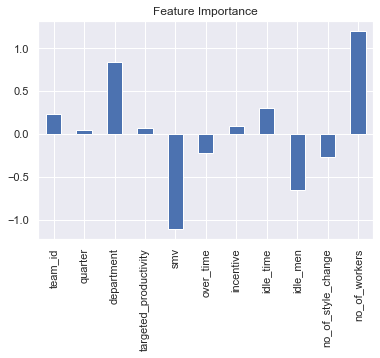

In [85]:
# Visualize feature importance
fdf = pd.DataFrame(features, index=[0])
fdf.T.plot.bar(title="Feature Importance", legend=False);

#### Experiments
Increasing the test sample size to 30%

In [86]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dt_scaler = scaler.fit(X_train)
sc_X_train = dt_scaler.transform(X_train)
sc_X_test = dt_scaler.transform(X_test)

In [88]:
# Balancing the data sets
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(sc_X_train, y_train,)

In [89]:
# Put models in a dictionary
models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=10000),
          "Linear SVC": LinearSVC(max_iter=10000)}

# Create function to fit and score models
def fit_and_score(models, X_train, sc_X_test, y_train, y_test):
    """
    Fits and evaluates the chosen machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    sc_X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(sc_X_test, y_test)
    return model_scores

In [90]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             sc_X_test=sc_X_test,
                             y_train=y_train,
                             y_test=y_test
                             )
model_scores

{'Random Forest': 0.7972222222222223,
 'Logistic Regression': 0.6583333333333333,
 'Linear SVC': 0.6611111111111111}

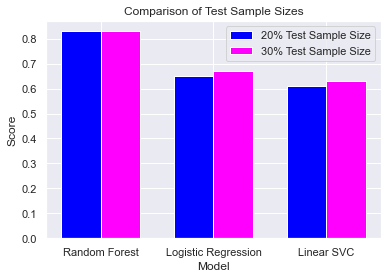

In [91]:
# Test Sample Sizes of 20% and 30%
test_sample_size_1 = {
    'Random Forest': [0.83],
    'Logistic Regression': [0.65],
    'Linear SVC': [0.61]
}

test_sample_size_2 = {
    'rf': [0.83],
    'lr': [0.67],
    'lsvc': [0.63]
}

# Extract the model names and scores
models = list(test_sample_size_1.keys())
samp_size1 = [score[0] for score in test_sample_size_1.values()]
samp_size2 = [score[0] for score in test_sample_size_2.values()]

# Create the bar chart
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, samp_size1, bar_width, label='20% Test Sample Size', color='blue')
plt.bar(index + bar_width, samp_size2, bar_width, label='30% Test Sample Size', color='magenta')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Test Sample Sizes')
plt.xticks(index + bar_width/2, models)
plt.legend()

# Display the plot
plt.show()


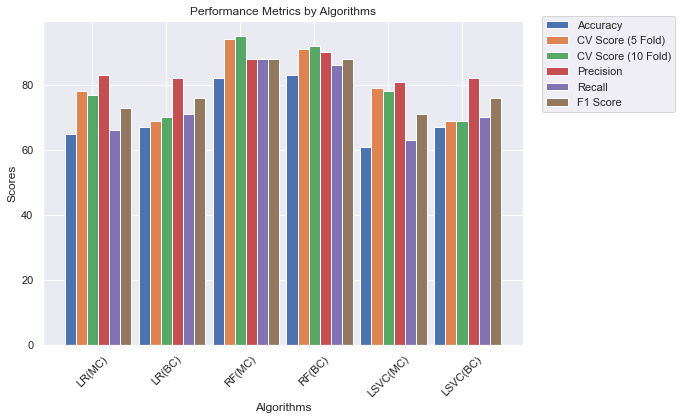

In [92]:
# Create the data from the table
metrics = ['Accuracy', 'Ave. Cross Validation Score (5 Fold)', 'Ave. Cross Validation Score (10 Fold)',
           'Precision', 'Recall', 'F1 Score']
algorithms = ['LR(MC)', 'LR(BC)', 'RF(MC)', 'RF(BC)', 'LSVC(MC)', 'LSVC(BC)']
accuracy = [65, 67, 82, 83, 61, 67]
cross_val_5 = [78, 69, 94, 91, 79, 69]
cross_val_10 = [77, 70, 95, 92, 78, 69]
precision = [83, 82, 88, 90, 81, 82]
recall = [66, 71, 88, 86, 63, 70]
f1_score = [73, 76, 88, 88, 71, 76]

# Create a list of indices for the algorithms
x = np.arange(len(algorithms))

# Set the width of the bars
bar_width = 0.15

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
b1 = ax.bar(x - 2 * bar_width, accuracy, bar_width, label='Accuracy')
b2 = ax.bar(x - bar_width, cross_val_5, bar_width, label='CV Score (5 Fold)')
b3 = ax.bar(x, cross_val_10, bar_width, label='CV Score (10 Fold)')
b4 = ax.bar(x + bar_width, precision, bar_width, label='Precision')
b5 = ax.bar(x + 2 * bar_width, recall, bar_width, label='Recall')
b6 = ax.bar(x + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()
plt.legend(loc = 'lower right', bbox_to_anchor=(1.33, 0.7))
# Display the plot
plt.tight_layout()
plt.show()
